In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

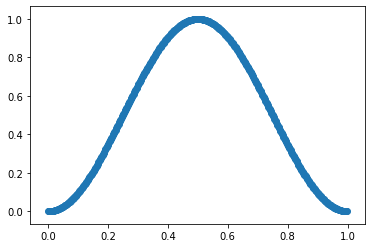

In [9]:
period = 1
ph = np.arange(0,1,.002)
y = (1-np.cos(period*ph*2*np.pi))/2
tmp = (np.array((ph,y)).T).reshape(1,500,2)
plt.scatter(tmp[0,:,0],tmp[0,:,1])

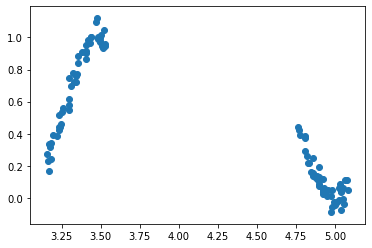

In [3]:
t1 = np.random.random(50)/2.5+3.14
t2 = np.random.random(50)/3+4.76
t = np.concatenate((t1,t2))
dy = .04*np.random.randn(len(t))
y = (1-np.cos(t*2*np.pi))/2 + dy
crv = np.array((t,y,dy)).T
plt.scatter(crv[:,0],crv[:,1])

In [4]:
class tmpfitter:
    def __init__ (self, tmps):
        self.n=0
        self.tmps=tmps

    def model(self, t, period, t0, amplitude, yoffset):
        # modify the template using peak-to-peak amplitude, yoffset
        # fold input times t by period, phase shift to match template
        xtemp = self.tmps[self.n,:,0]
        ytemp = self.tmps[self.n,:,1]*amplitude + yoffset
        ph = (t - t0) / period % 1
        #print((period,t0,amplitude,yoffset))
        # interpolate the modified template to the phase we want
        return interp1d(xtemp,ytemp)(ph)

def tmpfit(tmps,crv,pinit):
    datfit = []
    npars = []
    fitter = tmpfitter(tmps)
    for i in range(len(tmps)):
        fitter.n = i
        pars, cov = curve_fit(fitter.model, crv[:,0], crv[:,1], sigma=crv[:,2], p0=pinit, maxfev=10000)
        datfit.append(median(abs(fitter.model(crv[:,0],pars[0],pars[1],pars[2],pars[3])-crv[:,1])))
        npars.append(pars)
    n = np.argmin(datfit)
    return n, npars[n]

In [10]:
tmpfit(tmp,crv,(.9,0,1.1,0))

ValueError: A value in x_new is above the interpolation range.